In [ ]:
# %%

from tool import *
from scipy.ndimage import gaussian_filter

/usr/local/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/miniforge3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'FFT Denoised')

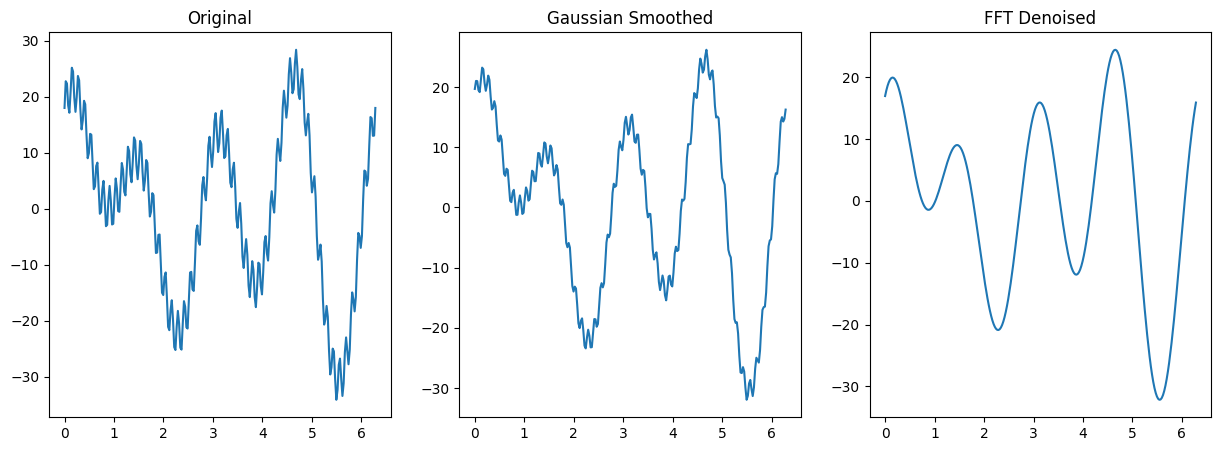

In [ ]:
# %%

# 生成时间序列
t = np.linspace(0, 2 * np.pi, 2**8)

# 生成信号
y = (
    10 * np.sin(2 * t)
    + 16 * np.cos(4 * t)
    + 2 * np.cos(t)
    + 8 * np.sin(3 * t)
    + 4 * np.sin(50 * t)
)

# 对该信号进行高斯平滑
smoothed_signal = gaussian_filter(y, sigma=1)

# 进行DFT去噪
fft_result = np.fft.fft(y)
max_nth_terms = np.argsort(np.abs(fft_result))[-6:]
_fft_max_nterms = np.zeros(fft_result.shape, dtype=fft_result.dtype)
_fft_max_nterms[max_nth_terms] = fft_result[max_nth_terms]
denoised_signal = np.fft.ifft(_fft_max_nterms)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(t, y)
axs[0].set_title("Original")
axs[1].plot(t, smoothed_signal)
axs[1].set_title("Gaussian Smoothed")
axs[2].plot(t, denoised_signal)
axs[2].set_title("FFT Denoised")

Showing OpenCV Image


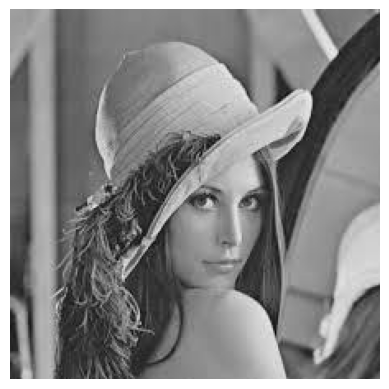

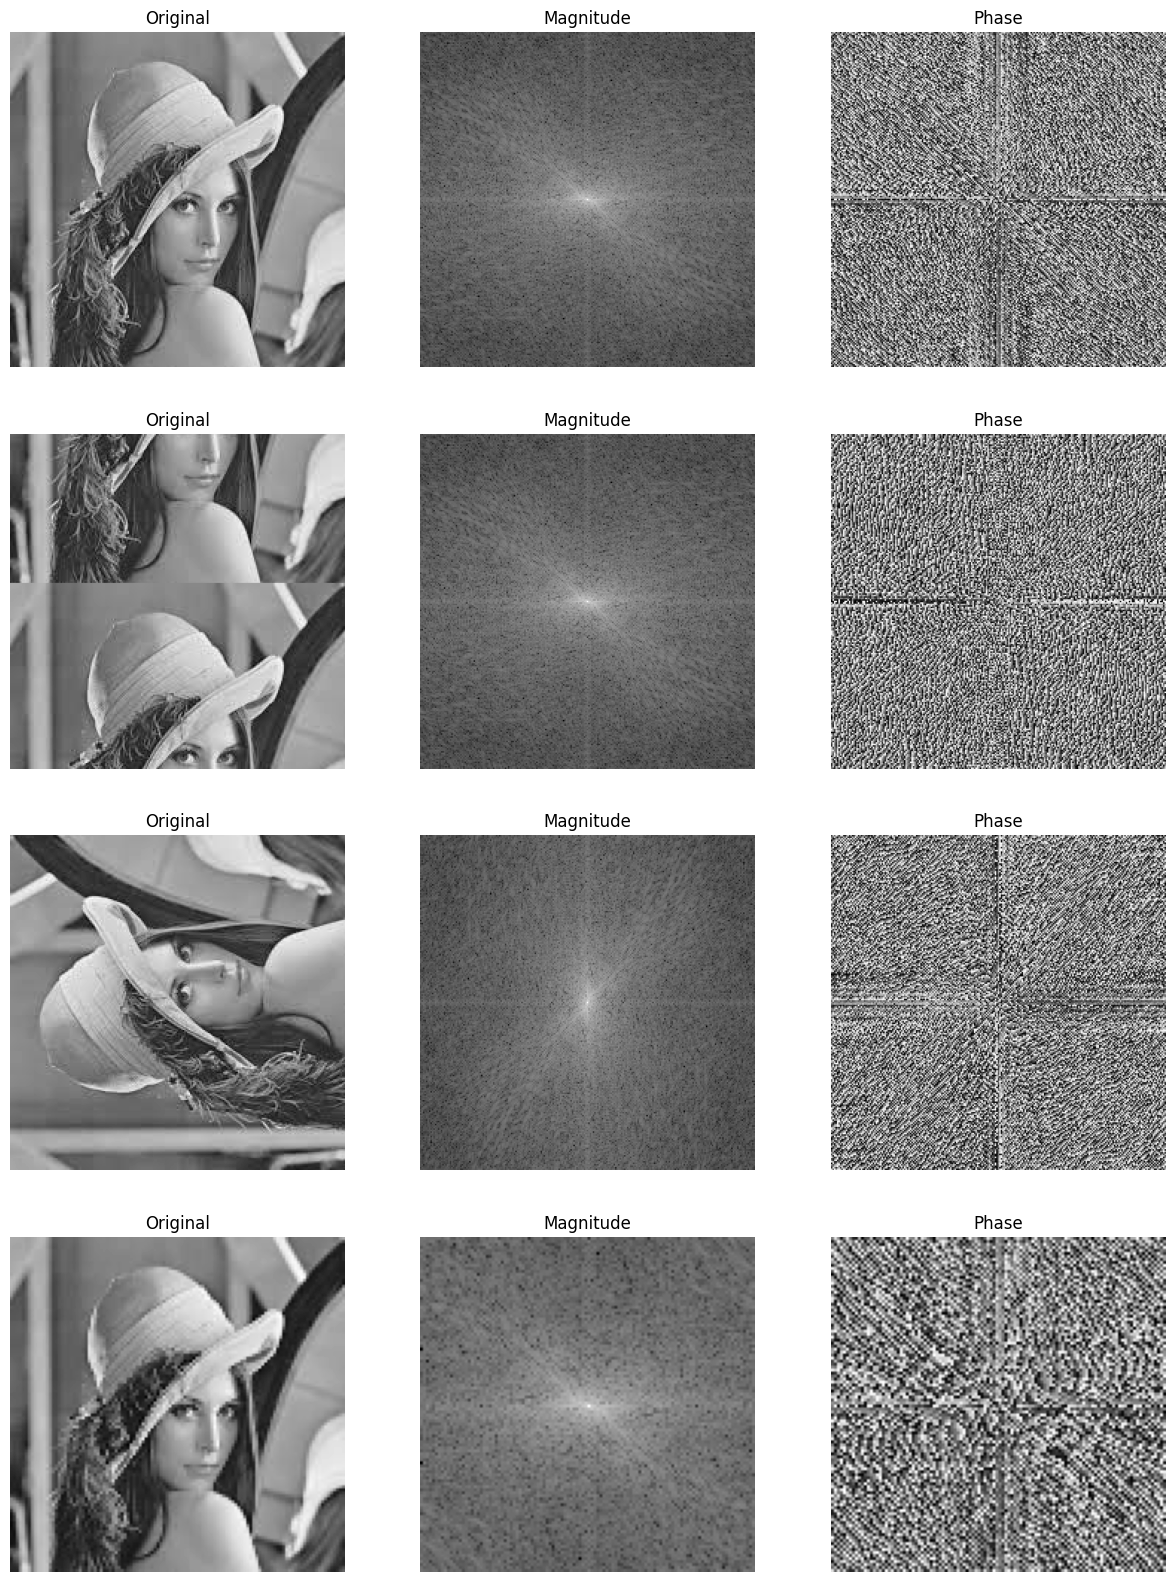

In [ ]:
# %%

# 作出其 FFT 之后的幅值图和相位图
lena = imread("L1_lena.jpg")
# 将 lena 沿 y 轴向下平移 100 像素
lena_shifted = np.roll(lena, 100, axis=0)
# 将 lena 逆时针旋转 90 度
lena_rotated = np.rot90(lena)
# 将 lena 放大至 1.2 倍
lena_scaled = cv2.resize(lena, (int(lena.shape[1] * 0.5), int(lena.shape[0] * 0.5)))

img_group = [lena, lena_shifted, lena_rotated, lena_scaled]

fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, img in enumerate(img_group):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_fft = np.fft.fft2(img_gray)
    img_fft_shift = np.fft.fftshift(img_fft)
    img_fft_magnitude = np.abs(img_fft_shift)
    img_fft_phase = np.angle(img_fft_shift)

    axs[i, 0].imshow(img_gray, cmap="gray")
    axs[i, 0].set_title("Original")
    axs[i, 0].axis("off")
    axs[i, 1].imshow(np.log1p(img_fft_magnitude), cmap="gray")
    axs[i, 1].set_title("Magnitude")
    axs[i, 1].axis("off")
    axs[i, 2].imshow(img_fft_phase, cmap="gray")
    axs[i, 2].set_title("Phase")
    axs[i, 2].axis("off")